**1. Load the dataset into python environment**

In [1]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#load data
data=pd.read_csv('/content/titanic_dataset (2).csv') 

In [3]:
#read data
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
#check shape of data
data.shape

(891, 12)

In [5]:
#data information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
#describe data
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
#check data types
data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

**2. Do all the necessary pre-processing steps**

**fill missing values**

In [8]:
#check for null values
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
#fill the null values in cabin by replacing it with unknown
data['Cabin'].fillna('unknown', inplace = True)

In [10]:
#fill the null values by taking the median
data['Age']=data['Age'].fillna(data['Age'].median())

In [11]:
#fill the null values by taking the mode
data['Embarked']=data['Embarked'].fillna(data['Embarked'].mode()[0])

In [12]:
#rechech null values
data.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

**outlier detection**

Text(0.5, 1.0, 'Pclass')

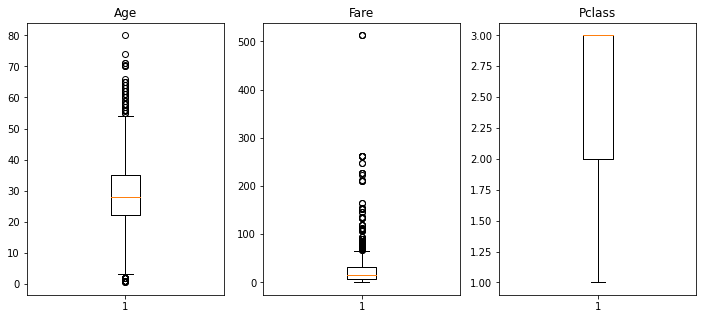

In [13]:
#plot boxplot for outlier detection
plt.figure(figsize=(12,5))
plt.subplot(1,3,1)
plt.boxplot(data['Age'])
plt.title('Age')
plt.subplot(1,3,2)
plt.boxplot(data['Fare'])
plt.title('Fare')
plt.subplot(1,3,3)
plt.boxplot(data['Pclass'])
plt.title('Pclass')

outliers in age and fare column

In [14]:
#find Lower Quartile (Q1), Median (Q2), Upper Quartile(Q3)
Q1=np.percentile(data['Age'],25,interpolation='midpoint')
Q2=np.percentile(data['Age'],50,interpolation='midpoint')
Q3=np.percentile(data['Age'],75,interpolation='midpoint')

In [15]:
#print Lower Quartile (Q1), Median (Q2), Upper Quartile(Q3)
print(Q1)
print(Q2)
print(Q3)


22.0
28.0
35.0


In [16]:
#find inter quartile range
IQR=Q3-Q1
IQR

13.0

In [17]:
#find upper and lower limit
low_lim=Q1-1.5*IQR
upp_lim=Q3+1.5*IQR


In [18]:
#print upper and lower limit
print(low_lim)
print(upp_lim)

2.5
54.5


In [19]:
#find outliers
outlier=[]
for x in data['Age']:
  if((x>upp_lim)or(x<low_lim)):
    outlier.append(x)

In [20]:
#print outliers
outlier

[2.0,
 58.0,
 55.0,
 2.0,
 66.0,
 65.0,
 0.83,
 59.0,
 71.0,
 70.5,
 2.0,
 55.5,
 1.0,
 61.0,
 1.0,
 56.0,
 1.0,
 58.0,
 2.0,
 59.0,
 62.0,
 58.0,
 63.0,
 65.0,
 2.0,
 0.92,
 61.0,
 2.0,
 60.0,
 1.0,
 1.0,
 64.0,
 65.0,
 56.0,
 0.75,
 2.0,
 63.0,
 58.0,
 55.0,
 71.0,
 2.0,
 64.0,
 62.0,
 62.0,
 60.0,
 61.0,
 57.0,
 80.0,
 2.0,
 0.75,
 56.0,
 58.0,
 70.0,
 60.0,
 60.0,
 70.0,
 0.67,
 57.0,
 1.0,
 0.42,
 2.0,
 1.0,
 62.0,
 0.83,
 74.0,
 56.0]

In [21]:
#find the index value  with outliers
index = data[(data['Age']>upp_lim)|(data['Age']<low_lim)].index

In [22]:
#print index
index

Int64Index([  7,  11,  15,  16,  33,  54,  78,  94,  96, 116, 119, 152, 164,
            170, 172, 174, 183, 195, 205, 232, 252, 268, 275, 280, 297, 305,
            326, 340, 366, 381, 386, 438, 456, 467, 469, 479, 483, 487, 492,
            493, 530, 545, 555, 570, 587, 625, 626, 630, 642, 644, 647, 659,
            672, 684, 694, 745, 755, 772, 788, 803, 824, 827, 829, 831, 851,
            879],
           dtype='int64')

In [23]:
#find Lower Quartile (Q1), Median (Q2), Upper Quartile(Q3)
Q1=np.percentile(data['Fare'],25,interpolation='midpoint')
Q2=np.percentile(data['Fare'],50,interpolation='midpoint')
Q3=np.percentile(data['Fare'],75,interpolation='midpoint')

In [24]:
#print Lower Quartile (Q1), Median (Q2), Upper Quartile(Q3)
print(Q1)
print(Q2)
print(Q3)


7.9104
14.4542
31.0


In [25]:
#find inter quartile range
IQR=Q3-Q1
IQR

23.0896

In [26]:
#find upper and lower limit
low_lim=Q1-1.5*IQR
upp_lim=Q3+1.5*IQR

In [27]:
#print upper and lower limit
print(low_lim)
print(upp_lim)

-26.724
65.6344


In [28]:
#find outliers
outlier=[]
for x in data['Fare']:
  if((x>upp_lim)or(x<low_lim)):
    outlier.append(x)

In [29]:
#print outliers
outlier

[71.2833,
 263.0,
 146.5208,
 82.1708,
 76.7292,
 80.0,
 83.475,
 73.5,
 263.0,
 77.2875,
 247.5208,
 73.5,
 77.2875,
 79.2,
 66.6,
 69.55,
 69.55,
 146.5208,
 69.55,
 113.275,
 76.2917,
 90.0,
 83.475,
 90.0,
 79.2,
 86.5,
 512.3292,
 79.65,
 153.4625,
 135.6333,
 77.9583,
 78.85,
 91.0792,
 151.55,
 247.5208,
 151.55,
 110.8833,
 108.9,
 83.1583,
 262.375,
 164.8667,
 134.5,
 69.55,
 135.6333,
 153.4625,
 133.65,
 66.6,
 134.5,
 263.0,
 75.25,
 69.3,
 135.6333,
 82.1708,
 211.5,
 227.525,
 73.5,
 120.0,
 113.275,
 90.0,
 120.0,
 263.0,
 81.8583,
 89.1042,
 91.0792,
 90.0,
 78.2667,
 151.55,
 86.5,
 108.9,
 93.5,
 221.7792,
 106.425,
 71.0,
 106.425,
 110.8833,
 227.525,
 79.65,
 110.8833,
 79.65,
 79.2,
 78.2667,
 153.4625,
 77.9583,
 69.3,
 76.7292,
 73.5,
 113.275,
 133.65,
 73.5,
 512.3292,
 76.7292,
 211.3375,
 110.8833,
 227.525,
 151.55,
 227.525,
 211.3375,
 512.3292,
 78.85,
 262.375,
 71.0,
 86.5,
 120.0,
 77.9583,
 211.3375,
 79.2,
 69.55,
 120.0,
 93.5,
 80.0,
 83.1583,
 6

In [30]:
#find the index value  with outliers
index = data[(data['Fare']>upp_lim)|(data['Fare']<low_lim)].index

In [31]:
#print index
index

Int64Index([  1,  27,  31,  34,  52,  61,  62,  72,  88, 102,
            ...
            792, 802, 820, 829, 835, 846, 849, 856, 863, 879],
           dtype='int64', length=116)

**correlation**

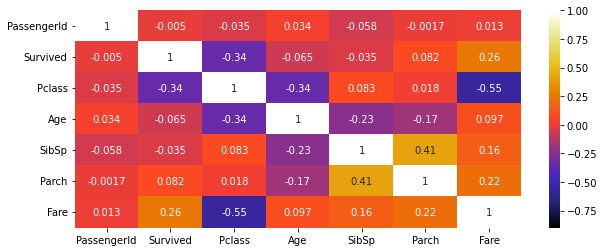

In [32]:
corrmatrix=data.corr()
plt.subplots(figsize=(10,4))
sns.heatmap(corrmatrix,vmin=-0.9,vmax=1,annot=True,cmap='CMRmap')

**label encoder**

In [33]:
#import library
from sklearn.preprocessing import LabelEncoder

In [34]:
#fit the model
label_encoder=LabelEncoder()

*to convert categorical data to numerical data*

In [35]:
data['Sex']=label_encoder.fit_transform(data['Sex'])

In [36]:
data['Embarked']=label_encoder.fit_transform(data['Embarked'])

In [37]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [38]:
#drop unnecessary columns
data1=data.drop(['PassengerId','Name','Ticket','Cabin'], axis=1)

In [39]:
data1.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


split train and test data

In [40]:
X=data1.drop('Survived',axis=1)
y=data1['Survived']

In [41]:
#import library
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

**Min Max Scaling**

In [42]:
X.describe()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,2.308642,0.647587,29.361582,0.523008,0.381594,32.204208,1.536476
std,0.836071,0.477990,13.019697,1.102743,0.806057,49.693429,0.791503
min,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,22.000000,0.000000,0.000000,7.910400,1.000000
50%,3.000000,1.000000,28.000000,0.000000,0.000000,14.454200,2.000000
75%,3.000000,1.000000,35.000000,1.000000,0.000000,31.000000,2.000000
max,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,2.000000


In [43]:
from sklearn.preprocessing import MinMaxScaler

In [44]:
X1 = X.drop([  'Pclass',	'SibSp',	'Parch','Sex','Embarked'], axis=1)

In [45]:
min_max_scaler=MinMaxScaler(feature_range=(0,1))

In [46]:
X1=min_max_scaler.fit_transform(X1)

In [47]:
X1=pd.DataFrame(X1,columns=['Age', 'Fare'])

In [48]:
X.drop(['Age','Fare'],axis=1,inplace=True)

In [49]:
X=pd.concat([X,X1],axis=1)

In [50]:
X.describe()

,Pclass,Sex,SibSp,Parch,Embarked,Age,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,2.308642,0.647587,0.523008,0.381594,1.536476,0.363679,0.062858
std,0.836071,0.477990,1.102743,0.806057,0.791503,0.163605,0.096995
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,0.000000,1.000000,0.271174,0.015440
50%,3.000000,1.000000,0.000000,0.000000,2.000000,0.346569,0.028213
75%,3.000000,1.000000,1.000000,0.000000,2.000000,0.434531,0.060508
max,3.000000,1.000000,8.000000,6.000000,2.000000,1.000000,1.000000


In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

**3. Create kNN and SVM models**

**KNeighbors Classifier**

In [52]:
#import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier

In [53]:
#check accuracy
from sklearn.metrics import accuracy_score

In [54]:
metric_k=[]
neighbors=range(3,20)
for k in neighbors:
  classifier= KNeighborsClassifier(n_neighbors=k)
  classifier=classifier.fit(X_train,y_train)
  y_pred_kNN=classifier.predict(X_test)
  acc=accuracy_score(y_test,y_pred_kNN)
  metric_k.append(acc)

In [55]:
metric_k

[0.7877094972067039,
 0.7988826815642458,
 0.8044692737430168,
 0.8156424581005587,
 0.8324022346368715,
 0.8156424581005587,
 0.8044692737430168,
 0.8100558659217877,
 0.7988826815642458,
 0.7932960893854749,
 0.7988826815642458,
 0.7988826815642458,
 0.8100558659217877,
 0.8212290502793296,
 0.8156424581005587,
 0.8100558659217877,
 0.7988826815642458]

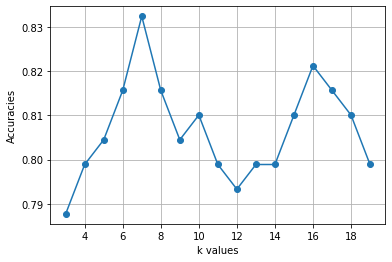

In [56]:
plt.plot(neighbors,metric_k,'o-')
plt.xlabel('k values')
plt.ylabel('Accuracies')
plt.grid()

In [57]:
classifier= KNeighborsClassifier(n_neighbors=7)
classifier=classifier.fit(X_train,y_train)
score_kNN=classifier.score(X_test,y_test)

In [58]:
#check score
score_kNN

0.8324022346368715

**Support Vector Classification**

In [59]:
#import Support Vector Classification
from sklearn.svm import SVC

In [60]:
svm_clf=SVC(kernel='rbf')
svm_clf=svm_clf.fit(X_train,y_train)
score_svm=svm_clf.score(X_test,y_test)

In [61]:
score_svm

0.7988826815642458

**4. Do k-fold and stratified stratified k-fold cross validation techniques and find the average accuracy score of the models**

k-fold cross validation - kNN model

In [62]:
from sklearn.model_selection import KFold

In [63]:
KFold_validator=KFold(10)

In [64]:
for train_index,test_index in KFold_validator.split(X,y):
  print('Training Index:',train_index)
  print('Test Index:',test_index)

Training Index: [ 90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251
 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269
 270 271 272 273 274 275 276 277 278 279 280 281 282 283 284 285 286 287
 288 289 290 291 292 293 294 295 296 297 298 299 300 301 302 303 304 305
 306 307 308 309 310 311 312 313 314 315 316 317 318 319 320 321 322 323
 324 325 326 327 328 329 330 331 33

In [65]:
from sklearn.model_selection import cross_val_score

In [66]:
cv_result=cross_val_score(classifier,X,y,cv=KFold_validator)

In [67]:
cv_result

array([0.76666667, 0.79775281, 0.75280899, 0.78651685, 0.85393258,
       0.82022472, 0.82022472, 0.69662921, 0.84269663, 0.76404494])

In [68]:
np.mean(cv_result)

0.7901498127340824

stratified k fold cross validation - kNN model

In [69]:
from sklearn.model_selection import StratifiedKFold

In [70]:
skfold_validator=StratifiedKFold(n_splits=10)

In [71]:
for train_index,test_index in skfold_validator.split(X,y):
  print('Training Index:',train_index)
  print('Test Index:',test_index)

Training Index: [ 82  84  85  88  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251
 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269
 270 271 272 273 274 275 276 277 278 279 280 281 282 283 284 285 286 287
 288 289 290 291 292 293 294 295 296 297 298 299 300 301 302 303 304 305
 306 307 308 309 310 311 312 313 314 315 316 317 318 319 320 321 322 323
 324 325 326 327 328 329 330 331 33

In [72]:
skcv_result=cross_val_score(classifier,X,y,cv=skfold_validator)

In [73]:
skcv_result

array([0.75555556, 0.80898876, 0.73033708, 0.7752809 , 0.87640449,
       0.82022472, 0.83146067, 0.71910112, 0.80898876, 0.76404494])

In [74]:
np.mean(skcv_result)

0.7890387016229713

KFold cross validation - SVM model

In [75]:
cv_result=cross_val_score(svm_clf,X,y,cv=KFold_validator)

In [76]:
cv_result

array([0.78888889, 0.84269663, 0.76404494, 0.85393258, 0.79775281,
       0.80898876, 0.78651685, 0.7752809 , 0.85393258, 0.79775281])

In [77]:
np.mean(cv_result)

0.8069787765293384

stratified k fold cross validation - SVM model

In [78]:
skcv_result=cross_val_score(svm_clf,X,y,cv=skfold_validator)

In [79]:
skcv_result

array([0.8       , 0.82022472, 0.7752809 , 0.85393258, 0.83146067,
       0.78651685, 0.80898876, 0.78651685, 0.82022472, 0.79775281])

In [80]:
np.mean(skcv_result)

0.8080898876404493

**Inference**

* **Accuracy of kNN Model with k fold cross validation is: 0.7901498127340824**
* **Accuracy of kNN Model with stratified k fold cross validation is:0.7890387016229713**
* **Accuracy of SVM Model with  k fold cross validation is:0.8069787765293384**
* **Accuracy of SVM Model with stratified k fold cross validation is:0.8080898876404493**
